> ## 🎯 Project Objective
> The purpose of this project is to analyze restaurant billing data in order to discover patterns and trends in tipping behavior. The main objectives are:
> 1. Analyze tip percentages across different days of the week.
> 2. Investigate the relationship between tip percentage and order size or party size.
> 3. Assess how smoking status affects tip percentages on various days.
> 4. Compare tip percentages by gender specifically for Saturday dinners.
> Through this analysis, we aim to better understand the factors influencing tip amounts and provide insights into customer behavior.


## 📋 Data Collection
> - total_bill: The total amount of the bill paid by the customer.
> - tip: The tip amount given by the customer.
> - sex: Gender of the person who paid the bill (Male or Female).
> - smoker: Indicates whether the bill payer is a smoker (Yes or No).
> - day: The day of the week when the order was placed (e.g., Thur, Fri, Sat, Sun).
> - time: The meal time (Lunch or Dinner).
> - size: Number of people in the group (party size).
> - Main tip: The tip as a percentage of the total bill (tip divided by total_bill, multiplied by 100).

## 📥 Data Loading
In this step, we load the restaurant tipping dataset into a pandas DataFrame for further analysis.
The data is imported from a CSV file containing information about each customer's bill, tip amount, demographic details, and other relevant features.
Importing libraries: We first import the required Python libraries for data analysis and visualization.
Reading the dataset: The dataset is loaded using pd.read_csv('tip.csv').
Previewing the data: We display the first few rows to confirm successful loading and to get an initial sense of the data structure.
This step ensures that the data is correctly loaded and ready for cleaning, exploration, and analysis in the following sections.

In [ ]:
# Import pandas and numpy for data manipulation and analysis

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('tip.csv')
print(df.head())

   total_bill   tip     sex smoker  day    time  size   Main tip
0       16.99  1.01  Female     No  Sun  Dinner     2   5.944673
1       10.34  1.66    Male     No  Sun  Dinner     3  16.054159
2       21.01  3.50    Male     No  Sun  Dinner     3  16.658734
3       23.68  3.31    Male     No  Sun  Dinner     2  13.978041
4       24.59  3.61  Female     No  Sun  Dinner     4  14.680765


## 👀 Data Overview

In this section, we take an initial look at the loaded dataset to better understand its structure and contents.  
We examine the shape of the data, column names and types, and display the first few rows.  
This overview helps us verify that the data has been loaded correctly and provides a foundation for further analysis.

- **Dataset shape:** Number of rows and columns.
- **Column names and data types:** Understanding the features and their types.
- **Sample records:** Previewing the first few rows to get a sense of the data values.

By reviewing these aspects, we can identify any immediate issues and plan the next steps for data cleaning and exploration.

In [ ]:
#Data criteria & Column names and types & First few rows of data

print("Shape:", df.shape)

print("\nColumns and types:")
print(df.dtypes)


Shape: (244, 8)

Columns and types:
total_bill    float64
tip           float64
sex            object
smoker         object
day            object
time           object
size            int64
Main tip      float64
dtype: object

First 5 rows:
   total_bill   tip     sex smoker  day    time  size   Main tip
0       16.99  1.01  Female     No  Sun  Dinner     2   5.944673
1       10.34  1.66    Male     No  Sun  Dinner     3  16.054159
2       21.01  3.50    Male     No  Sun  Dinner     3  16.658734
3       23.68  3.31    Male     No  Sun  Dinner     2  13.978041
4       24.59  3.61  Female     No  Sun  Dinner     4  14.680765


In [7]:
# Check for missing values and replace them with the most common values in the same column, removing duplicates

print(df.isnull().sum())

for col in ['sex', 'smoker', 'day', 'time']:
    df[col] = df[col].fillna(df[col].mode()[0])

df.drop_duplicates(inplace=True)

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
Main tip      0
dtype: int64


> ## Checking Column Values & Detecting Outliers
> In this step, two important data preprocessing tasks were performed:
> 1. Checking Column Values: The values in each column were reviewed to ensure validity, consistency, and that they fall within expected ranges. This process included checking for missing values, confirming data types, and identifying any anomalies or inconsistencies.
> 2. Detecting Outliers: Statistical techniques such as the IQR method and Z-score were used to identify outliers—data points that deviate significantly from the rest. Outliers can affect the results of the analysis, so they were flagged for further review or possible removal depending on their context.

In [15]:
#Checking column values

numeric_cloums = ['total_bill', 'tip', 'size']

categorical_columns = ['sex', 'smoker', 'day', 'time']

for col in numeric_cloums:
    if not pd.api.types.is_numeric_dtype(df[col]):
        print(f"Not Number")
    else:
        print(f"Number")

for col in categorical_columns:
    if not (pd.api.types.is_string_dtype(df[col]) or pd.api.types.is_categorical_dtype(df[col])):
        print(f"Not a thread or category")
    else:
        print(f"thread or category")

Number
Number
Number
thread or category
thread or category
thread or category
thread or category


In [16]:
#Detect Outliers

def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

#Example Usage
outliers_total_bill = detect_outliers_iqr(df, 'total_bill')
outliers_tip = detect_outliers_iqr(df, 'tip')
outliers_size = detect_outliers_iqr(df, 'size')

print("outliers in total_bill:\n",outliers_total_bill)
print("outliers in tip:\n",outliers_tip)
print("outliers in size:\n",outliers_size)

outliers in total_bill:
      total_bill    tip     sex smoker   day    time  size   Main tip
59        48.27   6.73    Male     No   Sat  Dinner     4  13.942407
102       44.30   2.50  Female    Yes   Sat  Dinner     3   5.643341
142       41.19   5.00    Male     No  Thur   Lunch     5  12.138869
156       48.17   5.00    Male     No   Sun  Dinner     6  10.379905
170       50.81  10.00    Male    Yes   Sat  Dinner     3  19.681165
182       45.35   3.50    Male    Yes   Sun  Dinner     3   7.717751
184       40.55   3.00    Male    Yes   Sun  Dinner     2   7.398274
197       43.11   5.00  Female    Yes  Thur   Lunch     4  11.598237
212       48.33   9.00    Male     No   Sat  Dinner     4  18.621974
outliers in tip:
      total_bill    tip     sex smoker   day    time  size   Main tip
23        39.42   7.58    Male     No   Sat  Dinner     4  19.228818
47        32.40   6.00    Male     No   Sun  Dinner     4  18.518519
59        48.27   6.73    Male     No   Sat  Dinner     4  1

> ## Plot Function Definition and Configuration
> Here, a reusable plotting function is defined to create charts with consistent styles and settings.
> The function handles:
> - Titles and axis labels
> - Gridlines and layout adjustments
> - Color schemes and marker styles
> - Optional annotations or legends
> Using a dedicated plotting function improves code readability, maintainability, and ensures all charts have a uniform appearance.

In [17]:
# Define a function to plot a chart

def plot_bar(data, title='', xlabel='', ylabel='', colors='skyblue', figsize=(10, 6), rotation=0):
    plt.figure(figsize=figsize)
    ax = data.plot(kind='bar', color=colors, edgecolor='black')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=rotation)
    add_value_labels(ax)
    plt.tight_layout()
    plt.show()


In [18]:
#Add labels to the values on the columns

def add_value_labels(ax):
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.2f}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='bottom', fontsize=10)

> ## Tip Percentage Analysis
> In this section, we analyze the percentage of the tip relative to the total bill for each customer.
> The tip percentage is calculated using the following formula:
> \[
> \text{Tip Percentage} = \frac{\text{tip}}{\text{total bill}} \times 100
> \]
> This metric helps us compare tipping behavior regardless of the bill amount.

In [19]:
# Calculate the average tip

df ['Main tip'] = df['tip'] / df['total_bill']  * 100
df.to_csv('tip.csv', index=False)

> ## Tip Analysis Summary
> In this section, statistical analyses are performed on the tip data using different grouping strategies.
> The aim is to explore how tipping behavior changes based on factors such as day of the week, group size, smoking status, and gender.

In [20]:
# Mean values

sorted_mean_tip_per_day = df.groupby('day')['tip'].mean().sort_values()
sorted_median_tip_per_day = df.groupby('day')['tip'].median()

sorted_mean_tip_by_size = df.groupby('size')['tip'].mean().sort_values()
sorted_median_tip_by_size = df.groupby('size')['tip'].median()

sorted_mean_tip_by_smoker_day = df.groupby(['smoker', 'day'])['tip'].mean().sort_values()
sorted_median_tip_by_smoker_day = df.groupby(['smoker', 'day'])['tip'].median()

Saturday_dinner = df[(df['day'] == 'Sat') & (df['time']  == 'Dinner')]
sorted_mean_tip_Saturday_dinner = Saturday_dinner.groupby ('sex') ['tip'].mean()

> ## 📊 Custom Bar Plot Function
> In this section, we define a custom bar plot function to visualize data with consistent and professional styling throughout the analysis.
>
> Key features of this function:
> - Flexible input parameters for data, titles, axis labels, colors, figure size, and rotation.
> - Automatic value labeling on each bar for better readability.
> - Consistent color schemes and layout for all bar charts.
> - Easy to reuse for different groupings and comparisons in the dataset.
>
> Why use a custom function?
> - Ensures all plots follow the same visual standards.
> - Reduces code repetition and increases maintainability.
> - Makes it easy to update the style or add new features to all plots at once.


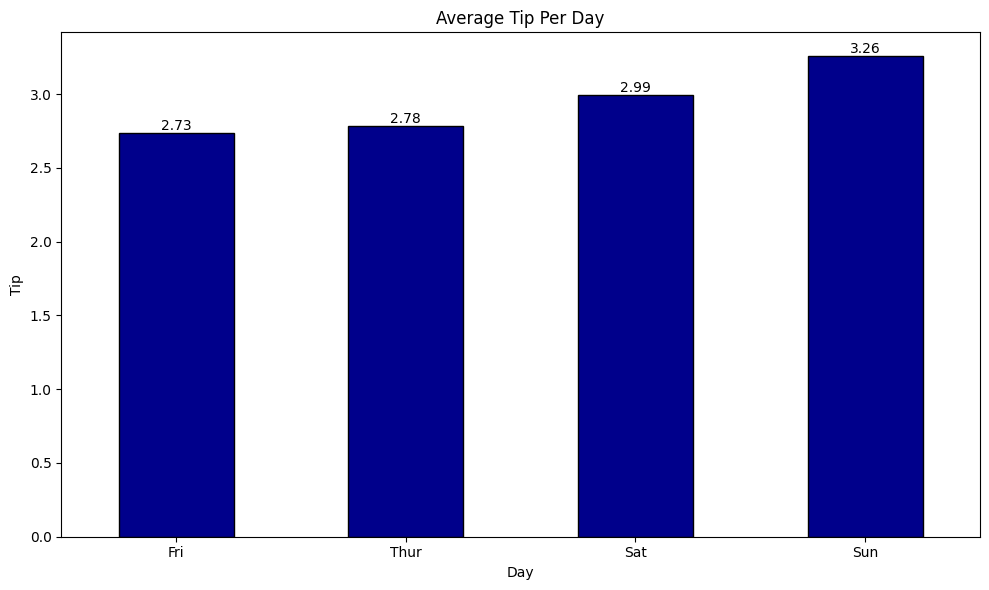

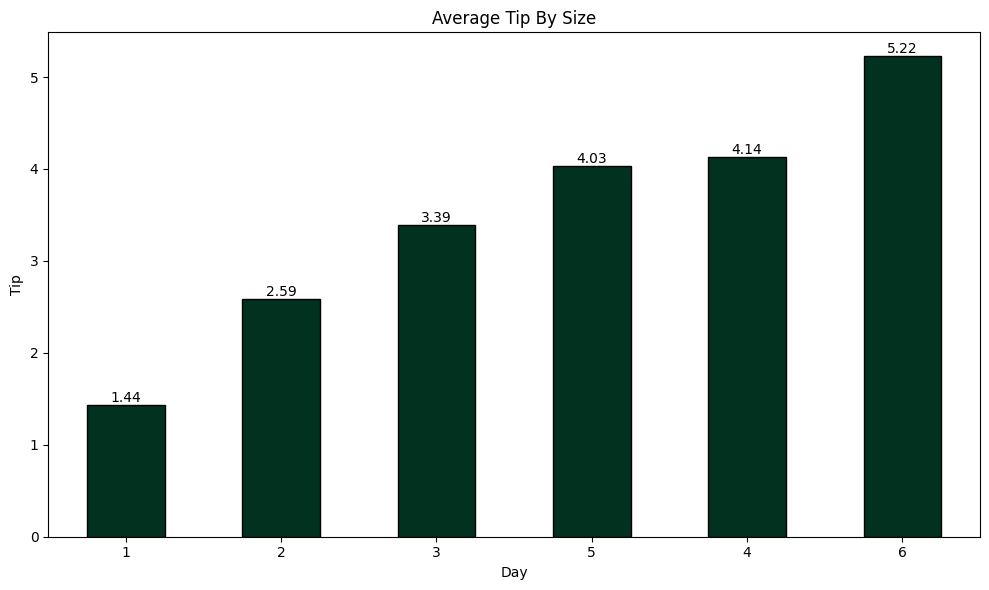

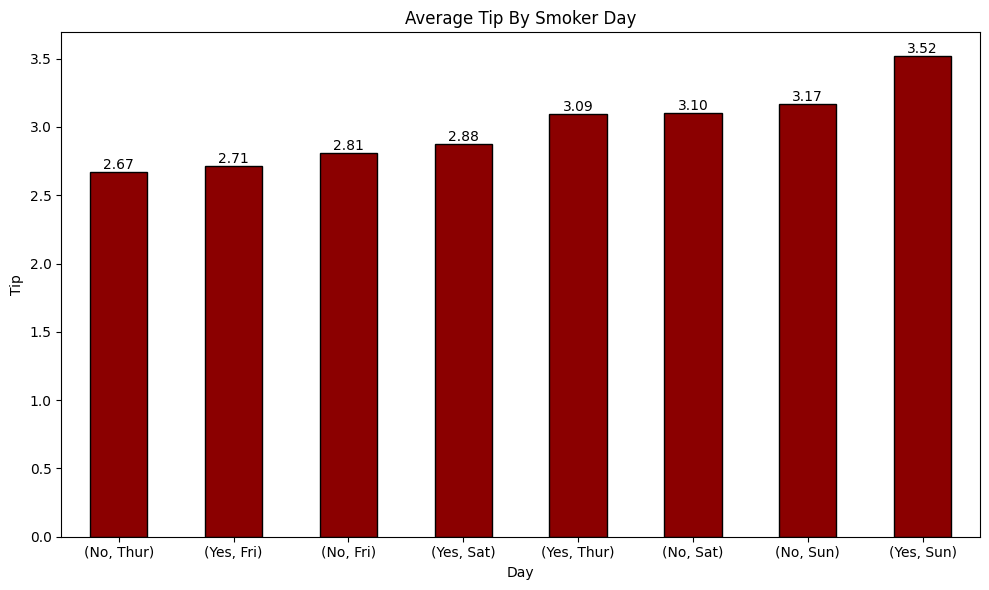

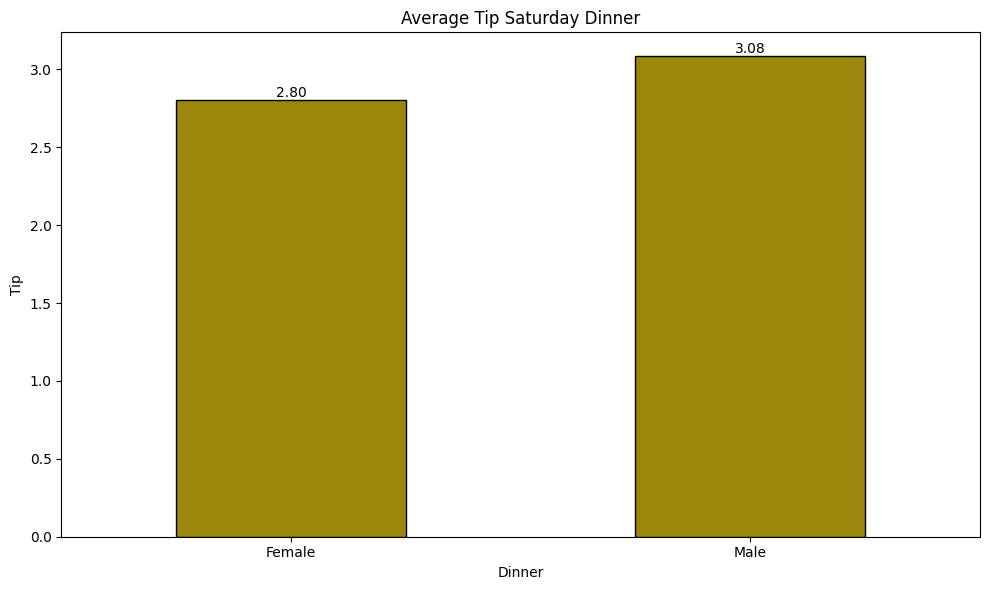

In [21]:
# Plotting bar charts to show average tips under different conditions with distinct colors

plot_bar(
    sorted_mean_tip_per_day,
    title='Average Tip Per Day',
    xlabel='Day',
    ylabel='Tip',
    colors='#00008b'
)

plot_bar(
    sorted_mean_tip_by_size,
    title='Average Tip By Size',
    xlabel='Day',
    ylabel='Tip',
    colors='#013220'
)

plot_bar(
    sorted_mean_tip_by_smoker_day,
    title='Average Tip By Smoker Day',
    xlabel='Day',
    ylabel='Tip',
    colors='#8B0000'
)

plot_bar(
    sorted_mean_tip_Saturday_dinner,
    title='Average Tip Saturday Dinner',
    xlabel='Dinner',
    ylabel='Tip',
    colors='#9B870C'
)



> ## Exploratory Data Analysis (EDA)
> In this section, we perform exploratory data analysis to better understand the dataset, its distributions, and relationships between variables.


In [22]:
print(df.describe(include='all'))

for col in df.select_dtypes(include='object').columns:
    print(f"{col}: {df[col].unique()}")

        total_bill         tip   sex smoker  day    time        size  \
count   243.000000  243.000000   243    243  243     243  243.000000   
unique         NaN         NaN     2      2    4       2         NaN   
top            NaN         NaN  Male     No  Sat  Dinner         NaN   
freq           NaN         NaN   157    151   87     176         NaN   
mean     19.813868    3.002387   NaN    NaN  NaN     NaN    2.572016   
std       8.910071    1.385002   NaN    NaN  NaN     NaN    0.952356   
min       3.070000    1.000000   NaN    NaN  NaN     NaN    1.000000   
25%      13.380000    2.000000   NaN    NaN  NaN     NaN    2.000000   
50%      17.810000    2.920000   NaN    NaN  NaN     NaN    2.000000   
75%      24.175000    3.575000   NaN    NaN  NaN     NaN    3.000000   
max      50.810000   10.000000   NaN    NaN  NaN     NaN    6.000000   

          Main tip  
count   243.000000  
unique         NaN  
top            NaN  
freq           NaN  
mean     16.083121  
std      

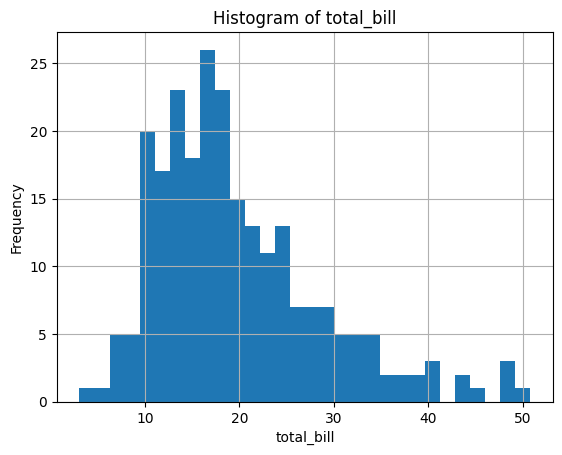

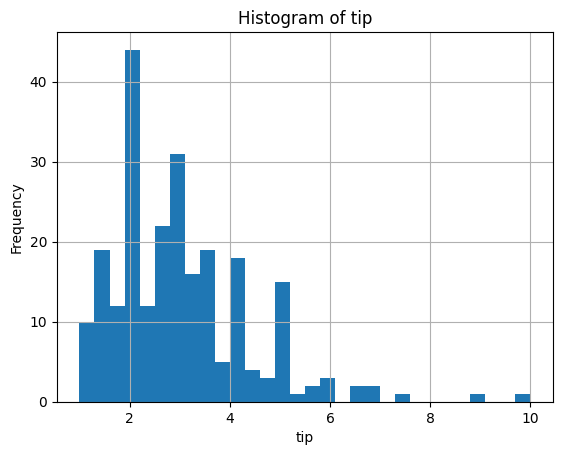

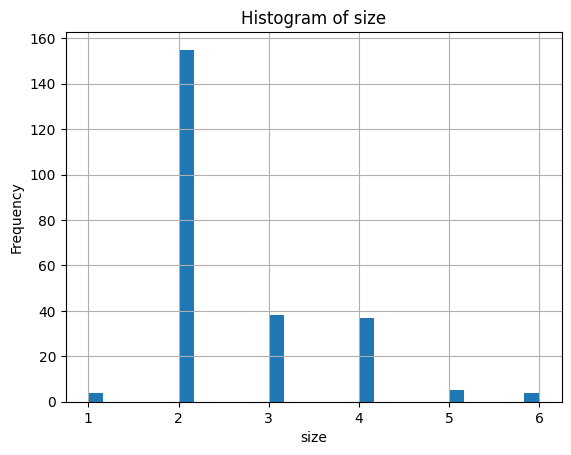

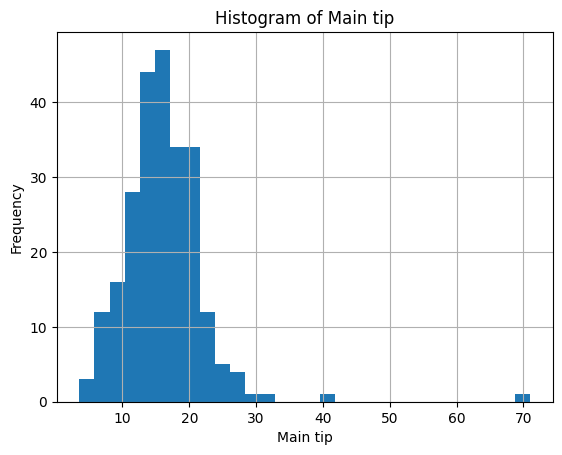

In [23]:
#Numerical feature analysis

numeric_cols = df.select_dtypes(include='number').columns

for col in numeric_cols:
    plt.Figure(figsize=(8, 4))
    df[col].hist(bins=30)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

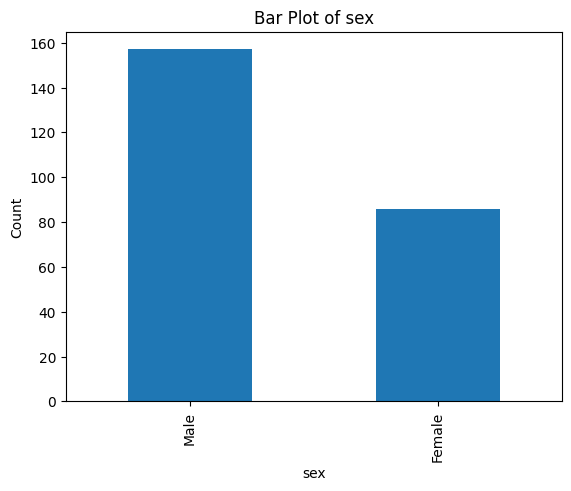

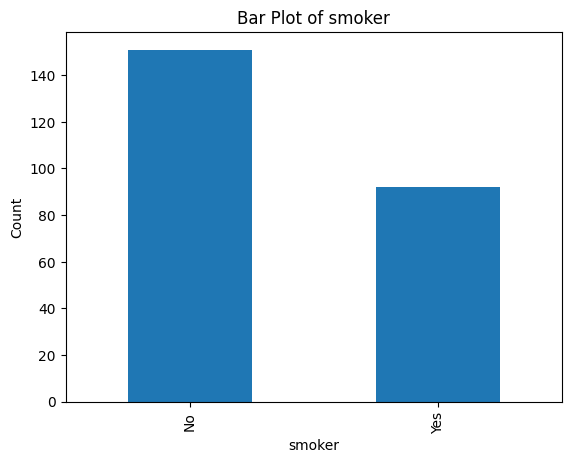

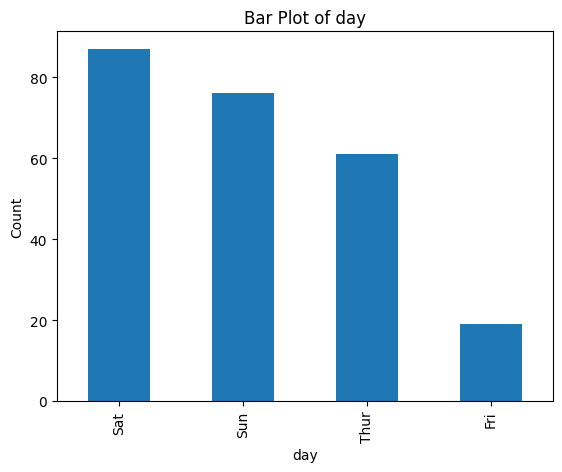

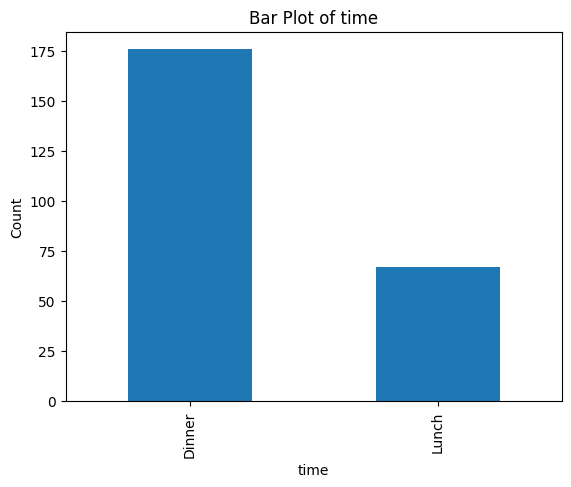

In [24]:
#Analysis of category characteristics

categorical_cols = df.select_dtypes(include='object').columns

for col in categorical_cols:
    plt.Figure(figsize=(8, 4))
    df[col].value_counts().plot(kind='bar')
    plt.title(f'Bar Plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

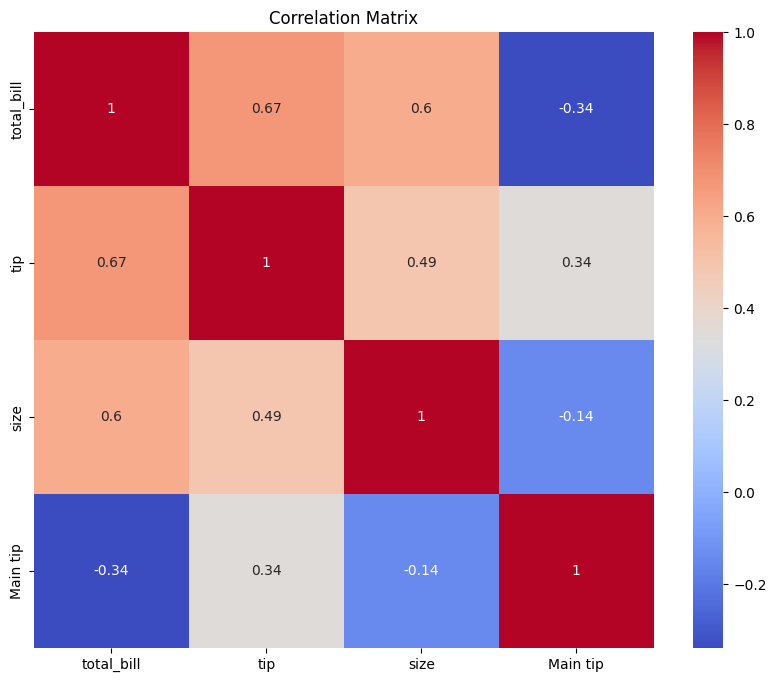

In [25]:
#Correlation matrix for numerical features

numeric_df = df.select_dtypes(include='number')

plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

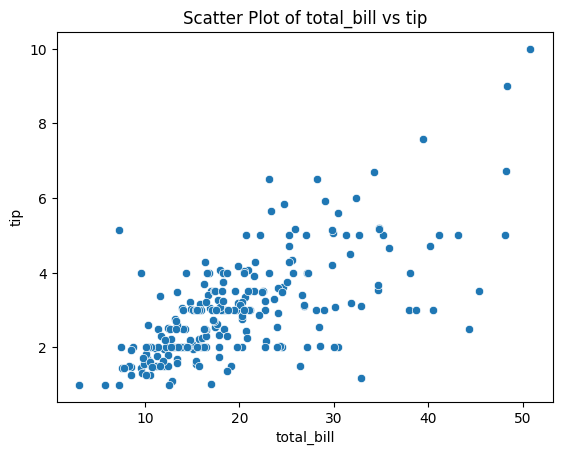

In [26]:
sns.scatterplot(data=df, x='total_bill', y='tip')
plt.title('Scatter Plot of total_bill vs tip')
plt.show()

In [27]:
#Average target variable based on each category

print(df.groupby('sex')['tip'].mean())
print(df.groupby('day')['tip'].mean())


sex
Female    2.843140
Male      3.089618
Name: tip, dtype: float64
day
Fri     2.734737
Sat     2.993103
Sun     3.255132
Thur    2.784098
Name: tip, dtype: float64


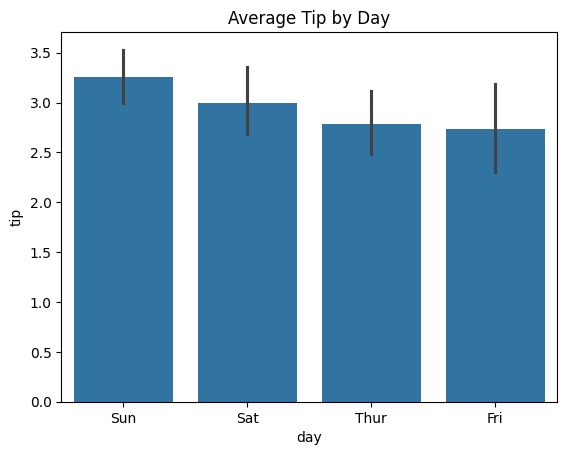

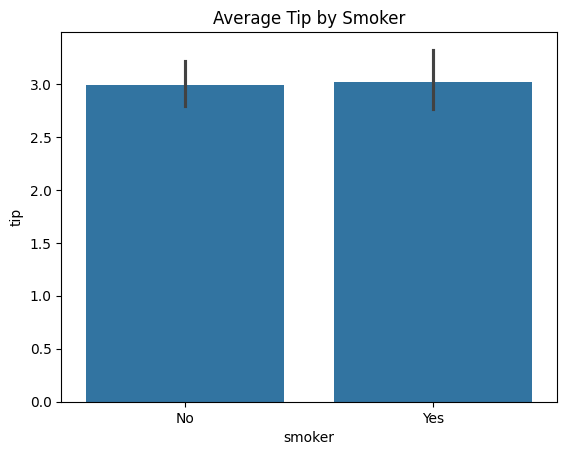

In [28]:
#Column chart of the average of the target variable based on each category

sns.barplot(data=df, x='day', y='tip')
plt.title('Average Tip by Day')
plt.show()\

sns.barplot(data=df, x='smoker', y='tip')
plt.title('Average Tip by Smoker')
plt.show()

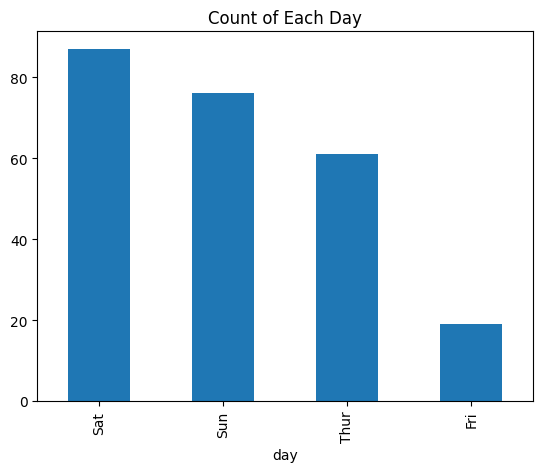

In [29]:
# Plot a bar chart showing the count of each unique value in the 'day' column

df['day'].value_counts().plot(kind='bar')
plt.title('Count of Each Day')
plt.show()